- **결합확률분포**: 확률변수(X, Y)의 움직임을 동시에 고려한 분포 :star:
- 확률의 성질: 확률은 반드시 0 이상이고, 1 이하여야 함

In [2]:
import numpy as np
import pandas as pd

In [3]:
x_set = np.arange(2, 13)
y_set = np.arange(1, 7)

In [6]:
# 외우세요
def f_XY(x, y):
    if 1 <= y <= 6 and 1 <= x - y <= 6:
        return y * (x-y) / 441
    else:
        return 0

In [7]:
XY = [x_set, y_set, f_XY]

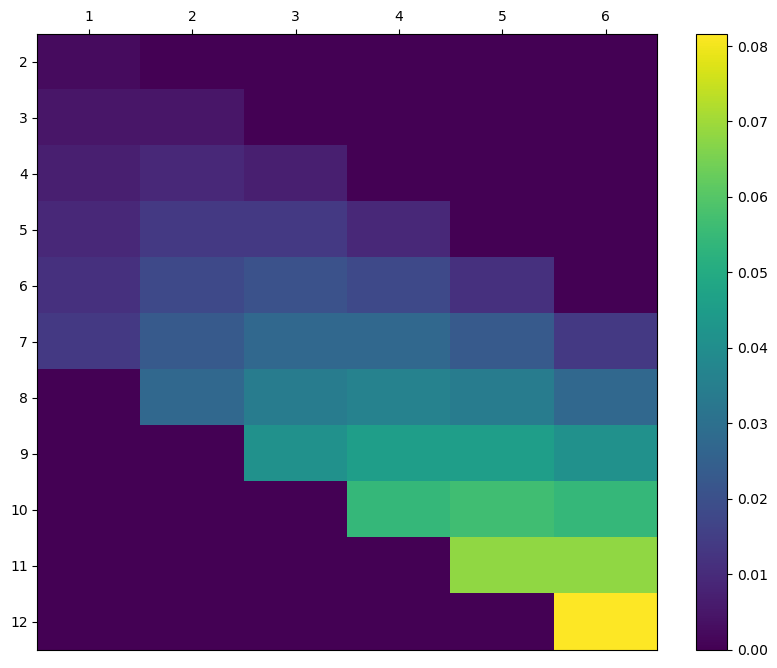

In [10]:
# 확률분포의 히트맵
import matplotlib.pyplot as plt

prob = np.array([[f_XY(x_i, y_j) for y_j in y_set]
                 for x_i in x_set])

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)

c = ax.pcolor(prob)
ax.set_xticks(np.arange(prob.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(prob.shape[0]) + 0.5, minor=False)
ax.set_xticklabels(np.arange(1, 7), minor=False)
ax.set_yticklabels(np.arange(2, 13), minor=False)

ax.invert_yaxis()

ax.xaxis.tick_top()
fig.colorbar(c, ax=ax)
plt.show()

---

In [11]:
np.all(prob >= 0)

np.True_

In [12]:
np.sum(prob)

np.float64(1.0)

---

In [13]:
# 주변확률분포
def f_X(x):
    return np.sum([f_XY(x, y_k) for y_k in y_set])

In [14]:
def f_Y(y):
    return np.sum([f_XY(x_k, y) for x_k in x_set])

In [15]:
X = [x_set, f_X]
Y = [y_set, f_Y]

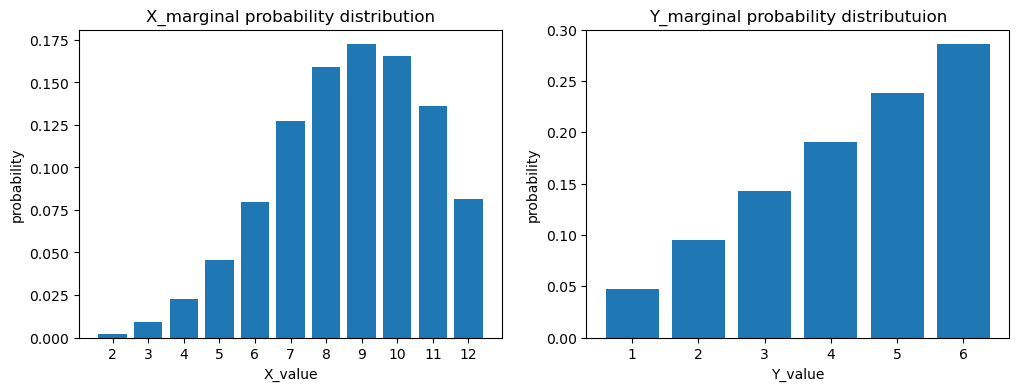

In [17]:
prob_x = np.array([f_X(x_k) for x_k in x_set])
prob_y = np.array([f_Y(y_k) for y_k in y_set])

fig = plt.figure(figsize=(12, 4))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.bar(x_set, prob_x)
ax1.set_title('X_marginal probability distribution')
ax1.set_xlabel('X_value')
ax1.set_ylabel('probability')
ax1.set_xticks(x_set)

ax2.bar(y_set, prob_y)
ax2.set_title('Y_marginal probability distributuion')
ax2.set_xlabel('Y_value')
ax2.set_ylabel('probability')

plt.show()

---

In [18]:
# 기댓값
np.sum([x_i * f_XY(x_i, y_j) for x_i in x_set for y_j in y_set])

np.float64(8.666666666666666)

In [20]:
# 중요
def E(XY, g):
    x_set, y_set, f_XY = XY
    return np.sum([g(x_i, y_j) * f_XY(x_i, y_j)
                    for x_i in x_set for y_j in y_set])

In [22]:
mean_X = E(XY, lambda x, y: x)
mean_X

np.float64(8.666666666666666)

In [23]:
mean_Y = E(XY, lambda x, y: y)
mean_Y

np.float64(4.333333333333333)

In [24]:
a, b = 2, 3

In [25]:
E(XY, lambda x, y: a*x + b*y)

np.float64(30.333333333333332)

In [27]:
a * mean_X + b * mean_Y

np.float64(30.333333333333332)

---

In [28]:
# 분산
np.sum([(x_i-mean_X)**2 * f_XY(x_i, y_j) for x_i in x_set for y_j in y_set])

np.float64(4.444444444444444)

In [29]:
def V(XY, g):
    x_set, y_set, f_XY = XY
    mean = E(XY, g)
    return np.sum([(g(x_i, y_j) - mean)**2 * f_XY(x_i, y_j) for x_i in x_set for y_j in y_set])

In [30]:
var_X = V(XY, g=lambda x, y: x)
var_X

np.float64(4.444444444444444)

In [31]:
var_Y = V(XY, g=lambda x, y: y)
var_Y

np.float64(2.2222222222222223)

In [33]:
# 공분산
def Cov(XY):
    x_set, y_set, f_XY = XY
    mean_X = E(XY, lambda x, y: x)
    mean_Y = E(XY, lambda x, y: y)
    return np.sum([(x_i-mean_X) * (y_j-mean_Y) * f_XY(x_i, y_j) for x_i in x_set for y_j in y_set])

In [34]:
cov_xy = Cov(XY)
cov_xy

np.float64(2.222222222222222)

In [35]:
V(XY, lambda x, y: a*x + b*y)

np.float64(64.44444444444444)

In [37]:
a**2 * var_X + b**2 * var_Y + 2*a*b * cov_xy

np.float64(64.44444444444443)

In [38]:
# 상관계수
cov_xy / np.sqrt(var_X * var_Y)

np.float64(0.7071067811865474)